In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import dates

import plotly.io as pio
import plotly.graph_objects as go
from plotly.figure_factory import create_distplot

import matplotlib


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Apple%20Financial%20Key%20Ratios/ratios.csv', delimiter=';', encoding = "utf8")
df.head()

,key_ratios,ratios_2011_09,ratios_2012_09,ratios_2013_09,ratios_2014_09,ratios_2015_09,ratios_2016_09,ratios_2017_09,ratios_2018_09,ratios_2019_09,ratios_2020_09,ttm
0,Revenue USD Mil,"108,249","156,508","170,91","182,795","233,715","215,639","229,234","265,595","260,174","274,515","347,155"
1,Gross Margin %,40.5,43.9,37.6,38.6,40.1,39.1,38.5,38.3,37.8,38.2,41.0
2,Operating Income USD Mil,"33,79","55,241","48,999","52,503","71,23","60,024","61,344","70,898","63,93","66,288","99,938"
3,Operating Margin %,31.2,35.3,28.7,28.7,30.5,27.8,26.8,26.7,24.6,24.1,28.8
4,Net Income USD Mil,"25,922","41,733","37,037","39,51","53,394","45,687","48,351","59,531","55,256","57,411","86,802"


In [8]:
df.isnull().sum()

key_ratios        0
ratios_2011_09    2
ratios_2012_09    0
ratios_2013_09    0
ratios_2014_09    0
ratios_2015_09    0
ratios_2016_09    0
ratios_2017_09    0
ratios_2018_09    0
ratios_2019_09    0
ratios_2020_09    0
ttm               0
dtype: int64

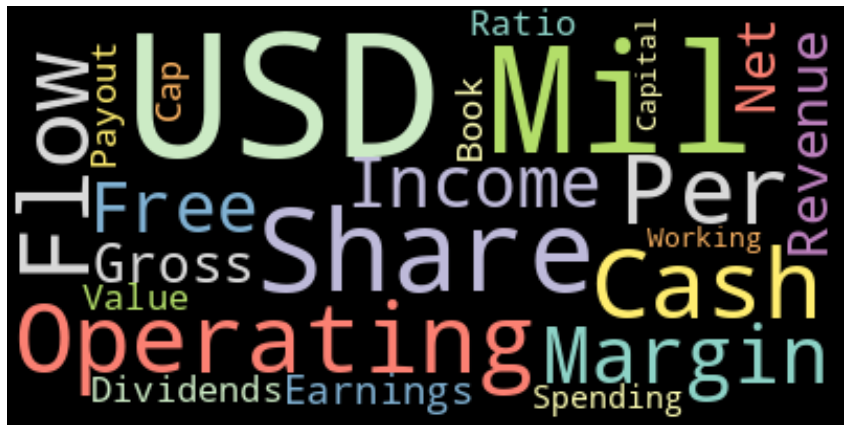

<Figure size 720x432 with 0 Axes>

In [9]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df.key_ratios)
wordcloud = WordCloud(max_words=200,colormap='Set3', background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder

for c in df.columns:
    if df[c].dtype=='float16' or  df[c].dtype=='float32' or  df[c].dtype=='float64':
        df[c].fillna(df[c].mean())

df = df.fillna(-999)
for f in df.columns:
    if df[f].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(df[f].values))
        df[f] = lbl.transform(list(df[f].values))
        
print('Labelling done.')

Labelling done.


In [11]:
ratio = df.groupby('key_ratios').sum()[['ratios_2011_09','ratios_2012_09','ratios_2013_09', 'ratios_2014_09', 'ratios_2015_09', 'ratios_2016_09', 'ratios_2017_09', 'ratios_2018_09', 'ratios_2019_09', 'ratios_2020_09', 'ttm' ]]
ratio.head()

,ratios_2011_09,ratios_2012_09,ratios_2013_09,ratios_2014_09,ratios_2015_09,ratios_2016_09,ratios_2017_09,ratios_2018_09,ratios_2019_09,ratios_2020_09,ttm
key_ratios,,,,,,,,,,,
0,6,8,11,12,9,11,12,11,9,10,7
1,0,1,0,0,0,0,0,0,0,0,1
2,1,2,1,1,1,1,1,1,1,1,2
3,2,3,2,2,2,2,2,4,3,6,10
4,3,3,3,3,3,3,3,3,7,9,0


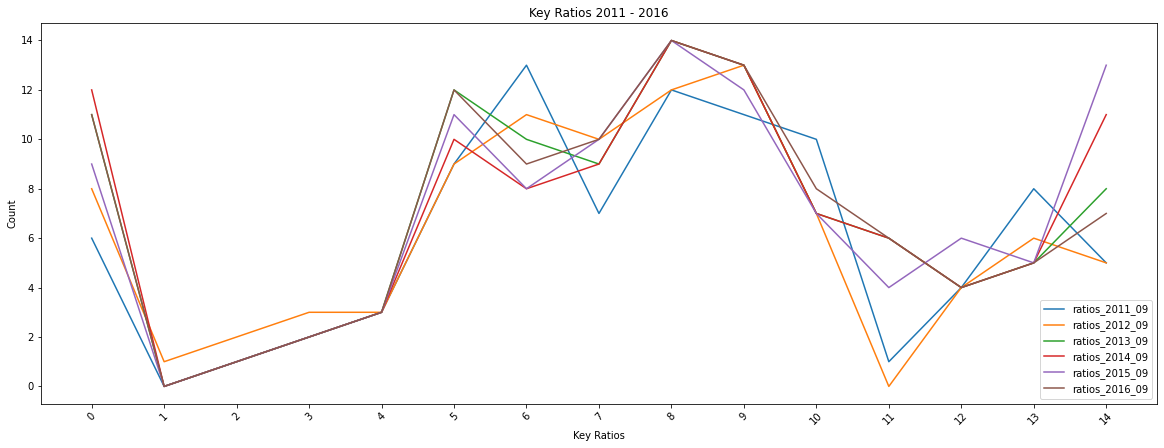

In [12]:
plt.figure(figsize=(20,7))
plt.plot(ratio['ratios_2011_09'], label='ratios_2011_09')
plt.plot(ratio['ratios_2012_09'], label='ratios_2012_09')
plt.plot(ratio['ratios_2013_09'], label='ratios_2013_09')
plt.plot(ratio['ratios_2014_09'], label='ratios_2014_09')
plt.plot(ratio['ratios_2015_09'], label='ratios_2015_09')
plt.plot(ratio['ratios_2016_09'], label='ratios_2016_09')
plt.legend()
plt.title('Key Ratios 2011 - 2016')
plt.xticks(ratio.index,rotation=45)
plt.xlabel('Key Ratios')
plt.ylabel('Count')
plt.show()

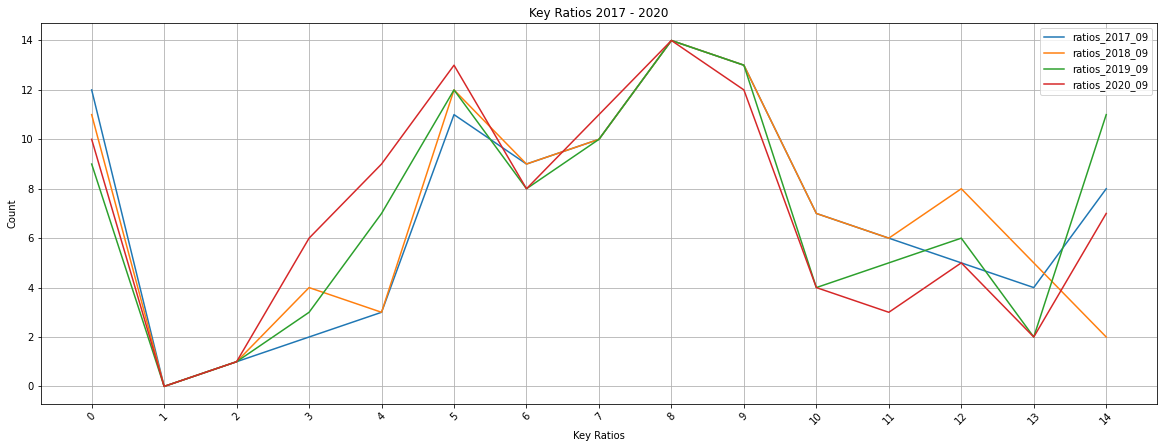

In [13]:
plt.figure(figsize=(20,7))
plt.plot(ratio['ratios_2017_09'], label='ratios_2017_09')
plt.plot(ratio['ratios_2018_09'], label='ratios_2018_09')
plt.plot(ratio['ratios_2019_09'], label='ratios_2019_09')
plt.plot(ratio['ratios_2020_09'], label='ratios_2020_09')
plt.legend()
plt.grid()
plt.title('Key Ratios 2017 - 2020')
plt.xticks(ratio.index,rotation=45)
plt.xlabel('Key Ratios')
plt.ylabel('Count')
plt.show()

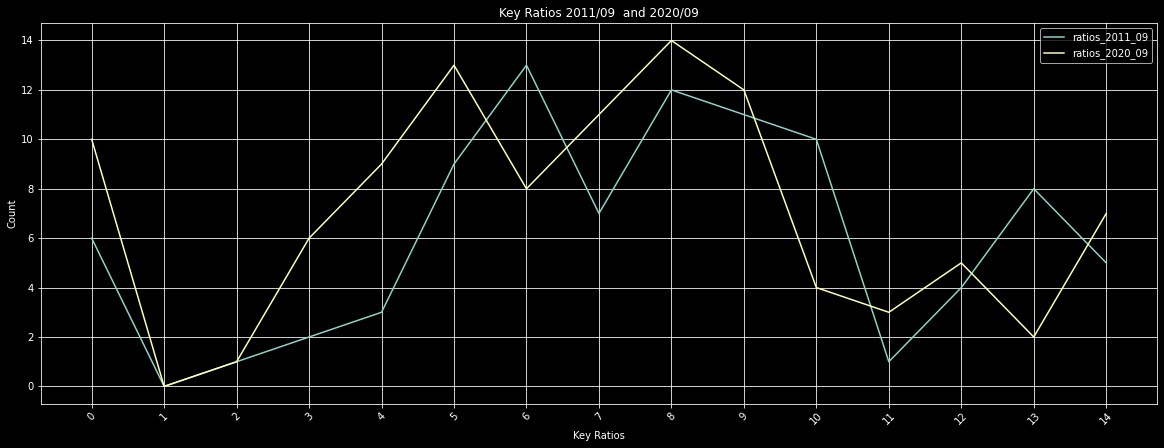

In [14]:

plt.style.use('dark_background')

plt.figure(figsize=(20,7))
plt.plot(ratio['ratios_2011_09'], label='ratios_2011_09')
plt.plot(ratio['ratios_2020_09'], label='ratios_2020_09')
plt.legend()
plt.grid()
plt.title('Key Ratios 2011/09  and 2020/09')
plt.xticks(ratio.index,rotation=45)
plt.xlabel('Key Ratios')
plt.ylabel('Count')
plt.show()

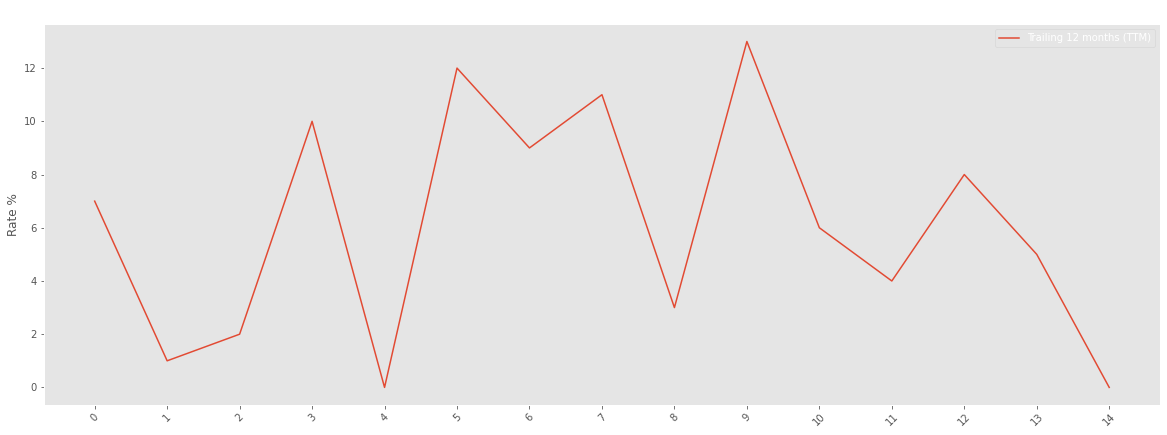

In [15]:
plt.style.use('ggplot')

plt.figure(figsize=(20,7))
plt.plot(ratio['ttm'], label='Trailing 12 months (TTM)')

plt.legend()
plt.grid()
plt.title('TTM 2011-2020 ')
plt.xticks(ratio.index,rotation=45)
plt.ylabel('Rate %')
plt.show()

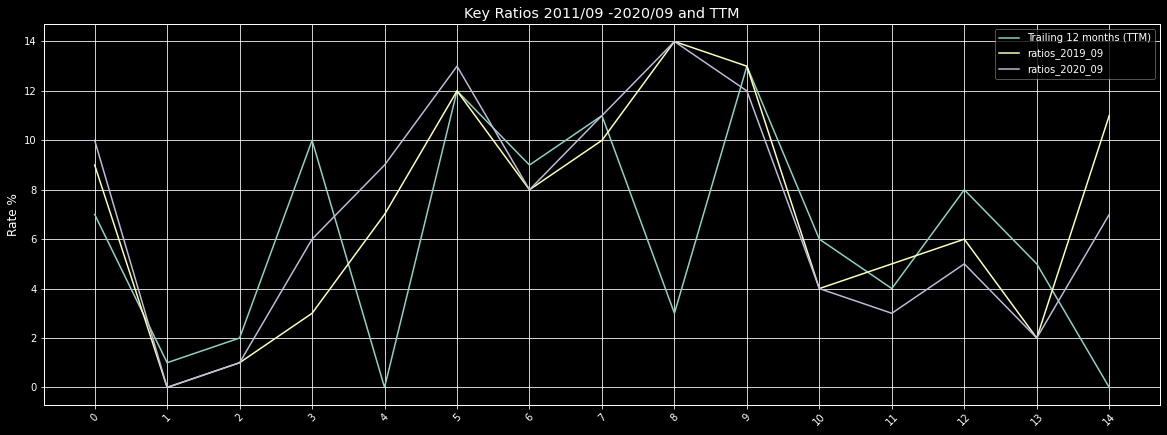

In [16]:
plt.style.use('dark_background')

plt.figure(figsize=(20,7))
plt.plot(ratio['ttm'], label='Trailing 12 months (TTM)')
plt.plot(ratio['ratios_2019_09'], label='ratios_2019_09')
plt.plot(ratio['ratios_2020_09'], label='ratios_2020_09')
plt.legend()
plt.title('Key Ratios 2011/09 -2020/09 and TTM')
plt.xticks(ratio.index,rotation=45)
plt.ylabel('Rate %')
plt.show()